# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Daru Adiyatma Rauf
- Email: darurauf@gmail.com
- Id Dicoding: Daru Adiyatma Rauf

## Persiapan

### Menyiapkan library yang dibutuhkan

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Menyiapkan data yang akan diguankan

## Data Understanding

In [51]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/data.csv'
data = pd.read_csv(data_path, sep=';')
data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_q

In [52]:
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


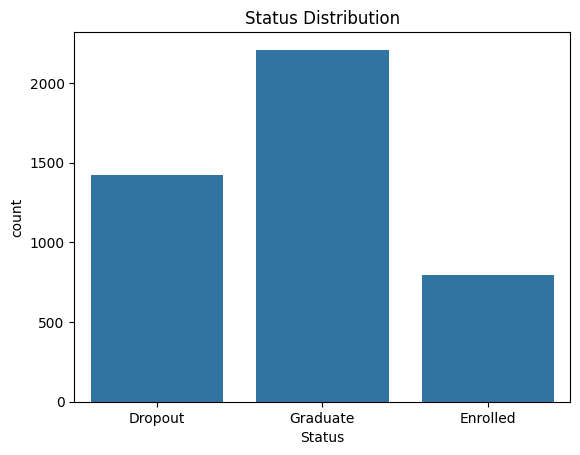

In [53]:
sns.countplot(x='Status', data=data)
plt.title('Status Distribution')
plt.show()


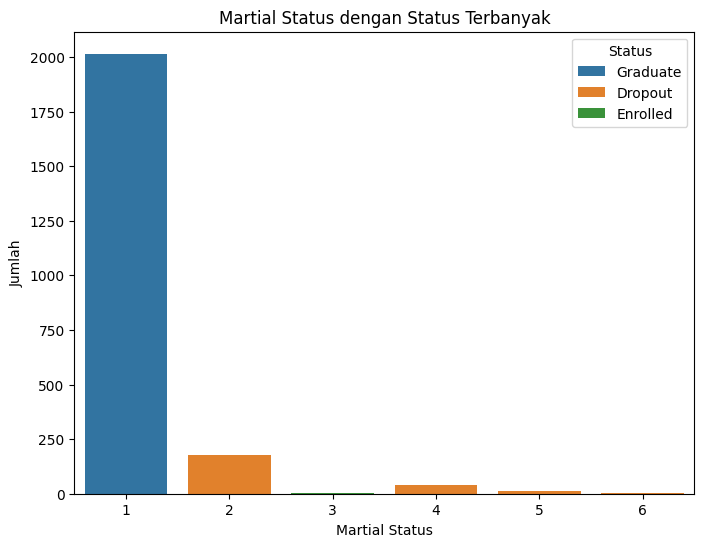

In [54]:
# Menghitung frekuensi Status untuk setiap martial_status
status_counts = data.groupby(['Marital_status', 'Status']).size().reset_index(name='count')

# Mendapatkan Status dengan frekuensi terbanyak di setiap martial_status
max_status = status_counts.loc[status_counts.groupby('Marital_status')['count'].idxmax()]

# Membuat visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital_status', y='count', hue='Status', data=max_status)

plt.title('Martial Status dengan Status Terbanyak')
plt.xlabel('Martial Status')
plt.ylabel('Jumlah')
plt.legend(title='Status')
plt.show()

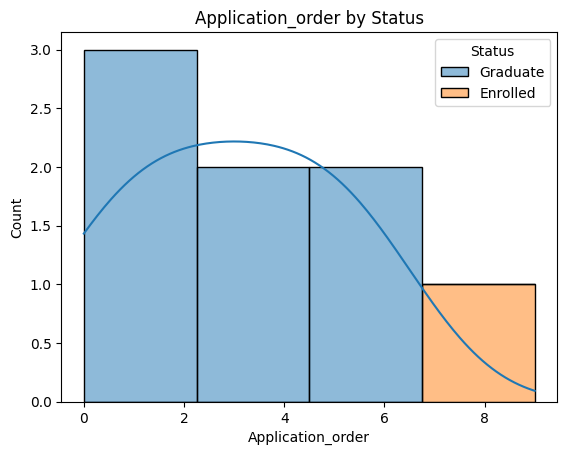

In [55]:
# Menghitung frekuensi Status untuk setiap martial_status
status_counts = data.groupby(['Application_order', 'Status']).size().reset_index(name='count')

# Mendapatkan Status dengan frekuensi terbanyak di setiap martial_status
max_status = status_counts.loc[status_counts.groupby('Application_order')['count'].idxmax()]

sns.histplot(data=max_status, x='Application_order', hue='Status', multiple='stack', kde=True)
plt.title('Application_order by Status')
plt.show()

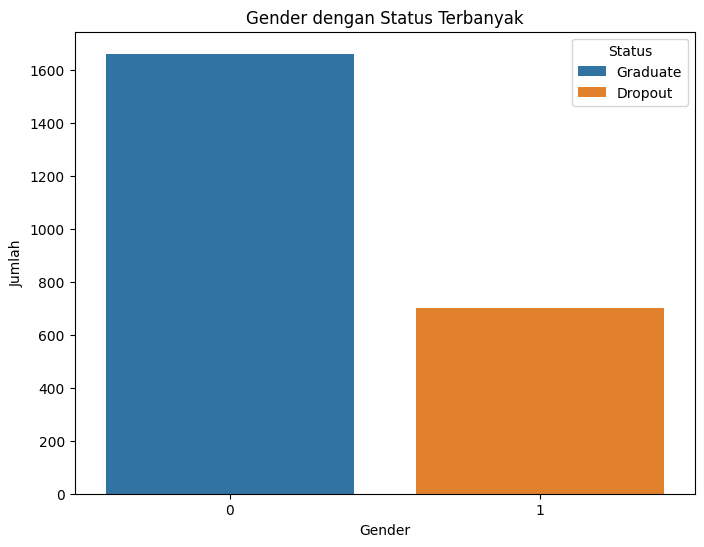

In [56]:
# Menghitung frekuensi Status untuk setiap martial_status
status_counts = data.groupby(['Gender', 'Status']).size().reset_index(name='count')

# Mendapatkan Status dengan frekuensi terbanyak di setiap martial_status
max_status = status_counts.loc[status_counts.groupby('Gender')['count'].idxmax()]

# Membuat visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='count', hue='Status', data=max_status)

plt.title('Gender dengan Status Terbanyak')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.legend(title='Status')
plt.show()

## Data Preparation / Preprocessing

In [62]:
numerical_columns = ['Unemployment_rate', 'Inflation_rate', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_grade', 'GDP']

min_max_values = {col: {'min': data[col].min(), 'max': data[col].max()} for col in numerical_columns}

# Menampilkan nilai minimum dan maksimum
for col, values in min_max_values.items():
    print(f"{col} -> Min: {values['min']}, Max: {values['max']}")

Unemployment_rate -> Min: 7.6, Max: 16.2
Inflation_rate -> Min: -0.8, Max: 3.7
Curricular_units_2nd_sem_grade -> Min: 0.0, Max: 18.571428571428573
Curricular_units_1st_sem_grade -> Min: 0.0, Max: 18.875
GDP -> Min: -4.06, Max: 3.51


In [63]:
# Menangani missing values
data['Status'].fillna(data['Status'].mode()[0], inplace=True)

# Normalisasi fitur numerik jika diperlukan
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ['Unemployment_rate', 'Inflation_rate', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_grade', 'GDP']  # Contoh kolom numerik
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Membagi data menjadi fitur dan label
X = data[numerical_columns]
y = data['Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-63-55a85e5d993d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Status'].fillna(data['Status'].mode()[0], inplace=True)


## Modeling

In [69]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

In [70]:
# Prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.64      0.59      0.61       316
    Enrolled       0.31      0.23      0.26       151
    Graduate       0.66      0.76      0.70       418

    accuracy                           0.61       885
   macro avg       0.53      0.52      0.53       885
weighted avg       0.59      0.61      0.60       885

Confusion Matrix:
 [[186  36  94]
 [ 45  34  72]
 [ 60  41 317]]
Accuracy: 0.6067796610169491


In [71]:
!pip freeze > requirements.txt

from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>